In [1]:
import os
import rnnSMAP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

trainName = 'CONUSv2f1'
out = trainName+'_y15_Forcing_dr60'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['OutSigma_L3_NA']
saveFolder = os.path.join(rnnSMAP.kPath['dirResult'], 'paperSigma')

doOpt = []
doOpt.append('loadData')
doOpt.append('plotConf')
# doOpt.append('plotProb')

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'lines.linewidth': 2})
matplotlib.rcParams.update({'lines.markersize': 10})
plt.tight_layout()

#################################################
# load data
dsLst = list()
statErrLst = list()
statSigmaLst = list()
statConfLst = list()
statProbLst = list()

for k in range(0, 3):
    if k == 0:  # validation
        testName = 'CONUSv2f1'
        yr = [2016]
    if k == 1:  # test
        testName = 'CONUSv2f1'
        yr = [2017]

    predField = 'LSTM'
    targetField = 'SMAP'
    ds = rnnSMAP.classDB.DatasetPost(
        rootDB=rootDB, subsetName=testName, yrLst=yr)
    ds.readData(var='SMAP_AM', field='SMAP')
    ds.readPred(rootOut=rootOut, out=out, drMC=100, field='LSTM')
    statErr = ds.statCalError(predField='LSTM', targetField='SMAP')
    statSigma = ds.statCalSigma(field='LSTM')
    statConf = ds.statCalConf(predField='LSTM', targetField='SMAP')
    statProb = ds.statCalProb(predField='LSTM', targetField='SMAP')
    dsLst.append(ds)
    statErrLst.append(statErr)
    statSigmaLst.append(statSigma)
    statConfLst.append(statConf)
    statProbLst.append(statProb)


load rnnSMAP
load rnnSMAP
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/SMAP_AM.csv 0.10113930702209473
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing/testSigma_CONUSv2f1_2015_2015_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing/test_CONUSv2f1_2015_2015_ep500.csv


/home/kxf227/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SMAP_AM.csv 0.10617613792419434
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.10394954681396484
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing/testSigma_CONUSv2f1_2016_2017_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing/test_CONUSv2f1_2016_2017_ep500.csv
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f2.csv
skipped rows
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f2/2015/SMAP_AM.csv 0.10500431060791016
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing/testSigma_CONUSv2f2_2015_2015_ep500.csv
reading /mnt/sdb/rnnSMAP/Output_SMAPgrid/L3_NA_sigma/CONUSv2f1_y15_Forcing/test_CONUSv2f2_2015_2015_ep500.csv


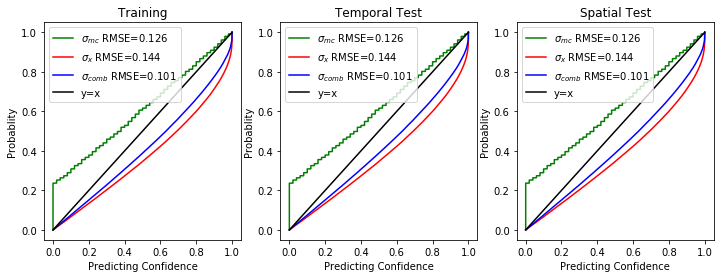

In [4]:
figTitleLst = ['Validation', 'Test']
    fig, axes = plt.subplots(
        ncols=len(figTitleLst), figsize=(12, 6), sharey=True)
    sigmaStrLst = ['sigmaX', 'sigmaMC', 'sigma']
    for iFig in range(0, 2):
        statConf = statConfLst[iFig]
        figTitle = figTitleLst[iFig]
        plotLst = list()
        for k in range(0, len(sigmaStrLst)):
            plotLst.append(getattr(statConf, 'conf_'+sigmaStrLst[k]))
        legendLst = [r'$p_{x}$', r'$p_{mc}$', r'$p_{comb}$']
        _, _, out = rnnSMAP.funPost.plotCDF(
            plotLst, ax=axes[iFig], legendLst=legendLst, cLst='grbm',
            xlabel='Predicting Probablity', ylabel=None, showDiff=False)
        axes[iFig].set_title(figTitle)
        print(out['rmseLst'])
        if iFig == 0:
            axes[iFig].set_ylabel('True Probablity')
    fig.show()
    saveFile = os.path.join(saveFolder, 'CONUS_conf')
    fig.savefig(saveFile, dpi=300)
    fig.savefig(saveFile+'.eps')